# NMR Spectra simulation

## Import data

In [ ]:
import numpy as np

filename_real = '../Data/Real_data/ST001706/1D/RCCdata.txt'
filename_200 = '../Data/Resolution/200.txt'
filename_300 = '../Data/Resolution/300.txt'
filename_500 = '../Data/Resolution/500.txt'
filename_1000 = '../Data/Resolution/1000.txt'
filename_1500 = '../Data/Resolution/1500.txt'
filename_3000 = '../Data/Resolution/3000.txt'
filename_5000 = '../Data/Resolution/5000.txt'
filename_7000 = '../Data/Resolution/7000.txt'
filename_10000 = '../Data/Resolution/10000.txt'
filename_30000 = '../Data/Resolution/30000.txt'

data_real = np.loadtxt(filename_real, dtype=float)
data_200 = np.loadtxt(filename_200, dtype=float)
data_300 = np.loadtxt(filename_300, dtype=float)
data_500 = np.loadtxt(filename_500, dtype=float)
data_1000 = np.loadtxt(filename_1000, dtype=float)
data_1500 = np.loadtxt(filename_1500, dtype=float)
data_3000 = np.loadtxt(filename_5000, dtype=float)
data_5000 = np.loadtxt(filename_5000, dtype=float)
data_7000 = np.loadtxt(filename_5000, dtype=float)
data_10000 = np.loadtxt(filename_10000, dtype=float)
data_30000 = np.loadtxt(filename_30000, dtype=float)

## Convert into dataframe

In [130]:
import pandas as pd

df_resolution = pd.DataFrame()

df_real = pd.DataFrame(data_real)
df_resolution['30000']=pd.Series(data_30000)
df_resolution['10000']=pd.Series(data_10000)
df_resolution['5000']=pd.Series(data_5000)
df_resolution['1500']=pd.Series(data_1500)
df_resolution['1000']=pd.Series(data_1000)
df_resolution['500']=pd.Series(data_500)
df_resolution['300']=pd.Series(data_300)
df_resolution['200']=pd.Series(data_200)

resolution_test = 11/df_real.shape[1]
test = df_real.loc[[20]].T
resolution_test
data_200.shape
test.to_numpy().squeeze()

array([ 3.7185497e-05,  9.4151851e-05,  1.0090207e-04, ...,
       -1.8871039e-05, -3.1702465e-05, -3.4217653e-05])

### Exploratory Analysis

In [131]:
#Pic threshold

delta =  test.max() / 100

test_sample[test_sample >= delta].count()
# df_resolution[df_resolution >= 5].count()

0    0
dtype: int64

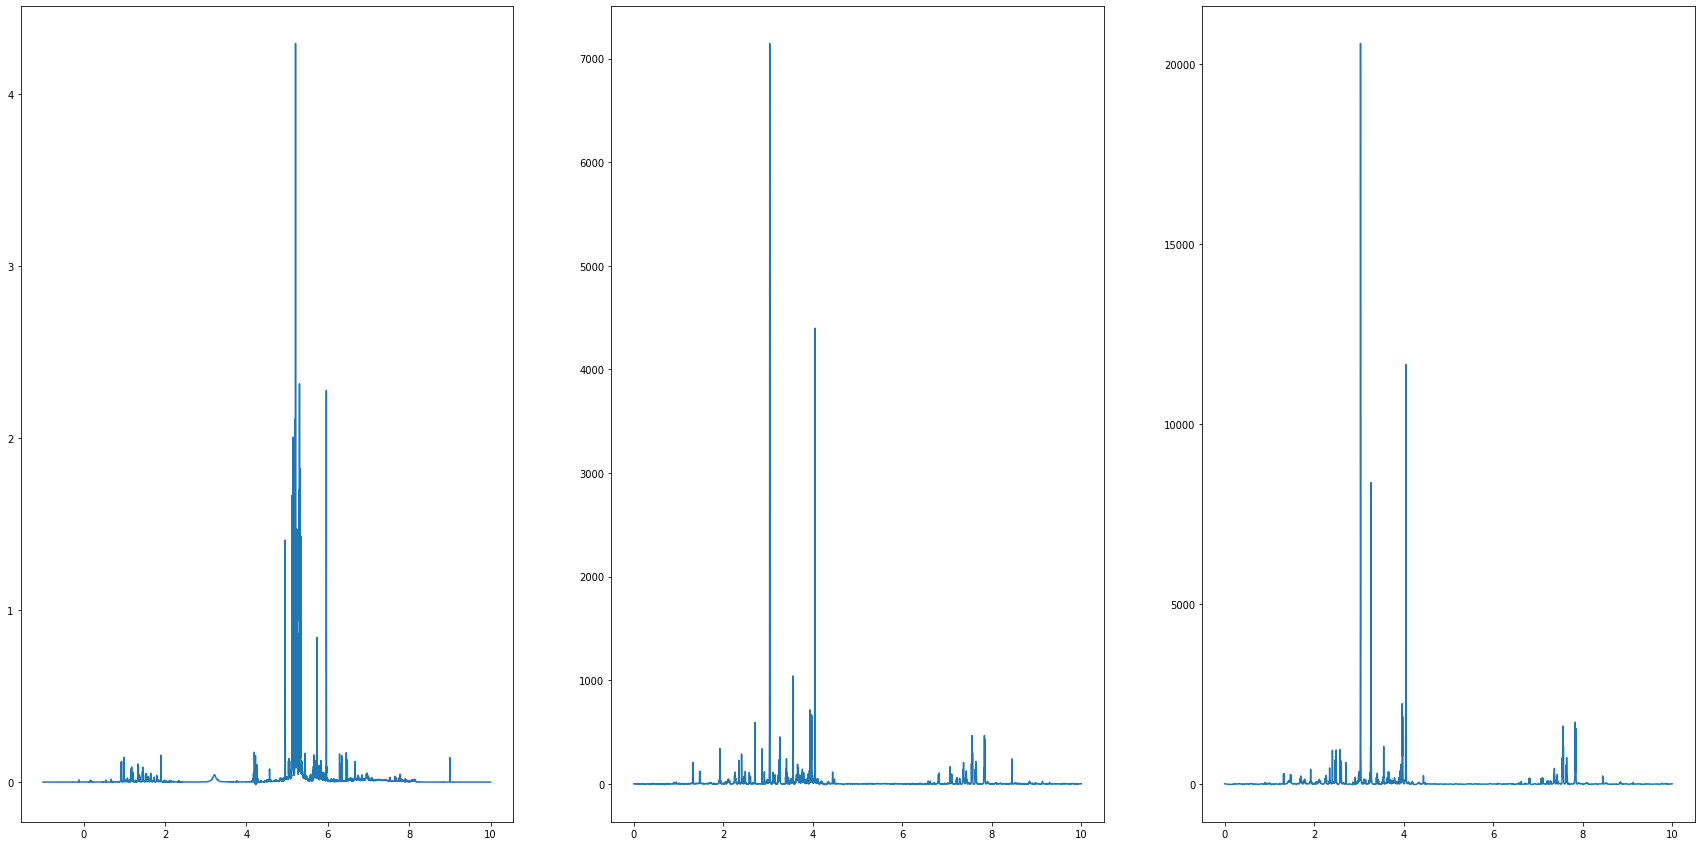

In [132]:
#Plot samples

import matplotlib.pyplot as plt

n_rows, n_cols = 1, 3
fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 15))
x_axis_test = np.linspace(-1, 10, num=df_real.shape[1])
x_axis_10000 = np.linspace(0, 10, num=10000)
x_axis_5000 = np.linspace(0, 10, num=5000)
axes[0].plot(x_axis_test, test)
axes[1].plot(x_axis_10000, data_10000)
axes[2].plot(x_axis_5000, data_5000)
plt.show()

In [136]:
import scipy as scy
from scipy.signal import peak_widths, find_peaks

peaks = find_peaks(test.to_numpy().squeeze(), height=0.1)
test_width = np.mean(peak_widths(test.to_numpy().squeeze(), peaks[0])[0]) * resolution_test

peaks = find_peaks(data_30000, height=500)
widths_30000 = np.mean(peak_widths(data_30000, peaks[0])[0]) * 10/30000

peaks = find_peaks(data_10000, height=500)
widths_10000 = np.mean(peak_widths(data_10000, peaks[0])[0]) * 10/10000

peaks = find_peaks(data_3000, height=500)
widths_3000 = np.mean(peak_widths(data_3000, peaks[0])[0]) * 10/3000

peaks = find_peaks(data_5000, height=500)
widths_5000 = np.mean(peak_widths(data_5000, peaks[0])[0]) * 10/5000

peaks = find_peaks(data_7000, height=500)
widths_7000 = np.mean(peak_widths(data_7000, peaks[0])[0]) * 10/7000

peaks = find_peaks(data_1500, height=500)
widths_1500 = np.mean(peak_widths(data_1500, peaks[0])[0]) * 10/1500

peaks = find_peaks(data_1000, height=500)
widths_1000 = np.mean(peak_widths(data_1000, peaks[0])[0]) * 10/1000

peaks = find_peaks(data_500, height=500)
widths_500 = np.mean(peak_widths(data_500, peaks[0])[0]) * 10/500

peaks = find_peaks(data_300, height=500)
widths_300 = np.mean(peak_widths(data_300, peaks[0])[0]) * 10/300

peaks = find_peaks(data_200, height=500)
widths_200 = np.mean(peak_widths(data_200, peaks[0])[0]) * 10/200

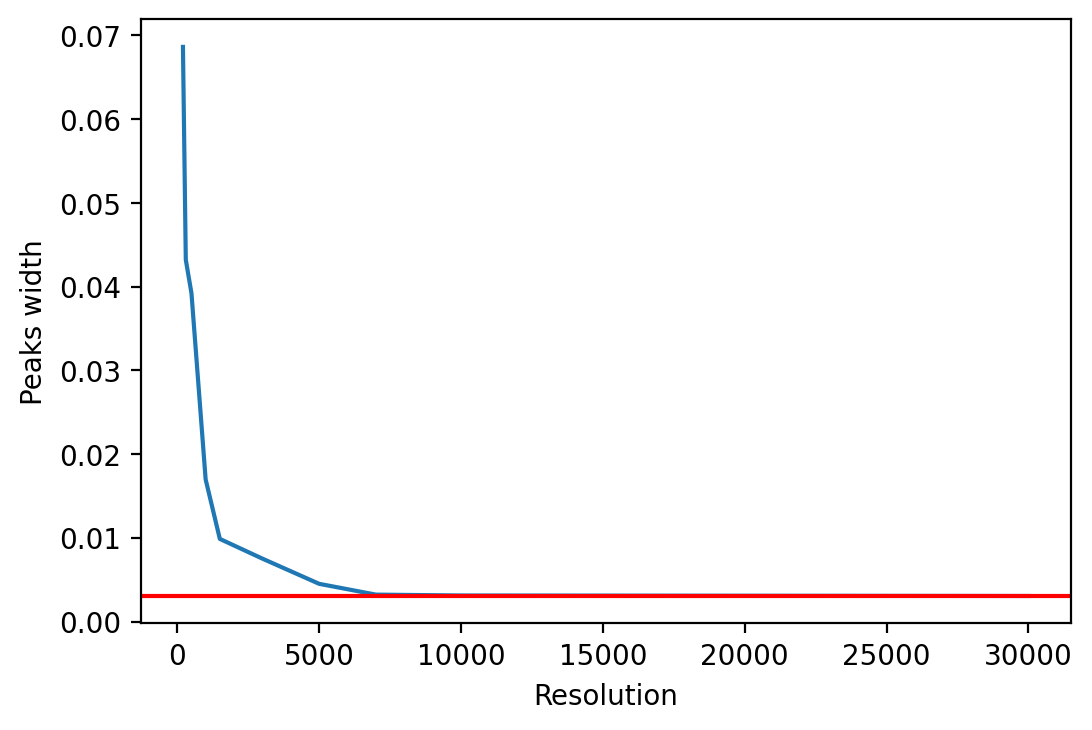

In [164]:
# fig = plt.figure()
# ax = fig.add_axes([0,0,1,1])
# resolutions = ['test', '30000', '10000', '7000', '5000', '3000', '1500', '1000', '500', '300', '200']
# widths = [test_width, widths_30000, widths_10000, widths_7000, widths_5000, widths_3000, widths_1500, widths_1000,
#           widths_500, widths_300, widths_200]
# ax.bar(resolutions, widths)
# plt.show()

plt.figure(dpi= 200)
xaxis = [200, 300, 500, 1000, 1500, 3000, 5000, 7000, 10000, 30000]
widths = list(reversed([widths_30000, widths_10000, widths_7000, widths_5000, widths_3000, widths_1500, widths_1000,
          widths_500, widths_300, widths_200]))
plt.plot(xaxis, widths)
plt.axhline(y = test_width, color = 'r', linestyle = '-')
plt.ylabel("Peaks width")
plt.xlabel("Resolution")
plt.show()